# Ансамбли моделей машинного обучения
# Цель лабораторной работы: изучение ансамблей моделей машинного обучения.

# Задание
Выберите набор данных (датасет) для решения задачи классификации или регресии.

В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.

С использованием метода train_test_split разделите выборку на обучающую и тестовую.

Обучите следующие ансамблевые модели:

    одну из моделей группы бэггинга (бэггинг или случайный лес или сверхслучайные деревья);

    одну из моделей группы бустинга;

    одну из моделей группы стекинга.

(+1 балл на экзамене) Дополнительно к указанным моделям обучите еще две модели:
Модель многослойного персептрона.
По желанию, вместо библиотеки scikit-learn возможно использование библиотек TensorFlow, PyTorch
или других аналогичных библиотек.
Модель МГУА с использованием библиотеки - https://github.com/kvoyager/GmdhPy (или аналогичных библиотек). 
Найдите такие параметры запуска модели, при которых она будет по крайней мере не хуже, 
чем одна из предыдущих ансамблевых моделей.

Оцените качество моделей с помощью одной из подходящих для задачи метрик. Сравните качество полученных моделей.

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm, tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from operator import itemgetter


def make_dataframe(ds_function):
    ds = ds_function()
    df = pd.DataFrame(data= np.c_[ds['data'], ds['target']],
                     columns= list(ds['feature_names']) + ['target'])
    return df

wine = load_wine()

df = make_dataframe(load_wine)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [6]:
def count_nan(data):
    for col in data.columns:
        count_nan = data[data[col].isnull()].shape[0]
        print('{} имеет NAN: {}'.format(col, count_nan))
count_nan(df)

alcohol имеет NAN: 0
malic_acid имеет NAN: 0
ash имеет NAN: 0
alcalinity_of_ash имеет NAN: 0
magnesium имеет NAN: 0
total_phenols имеет NAN: 0
flavanoids имеет NAN: 0
nonflavanoid_phenols имеет NAN: 0
proanthocyanins имеет NAN: 0
color_intensity имеет NAN: 0
hue имеет NAN: 0
od280/od315_of_diluted_wines имеет NAN: 0
proline имеет NAN: 0
target имеет NAN: 0


# Разделение на тестовую и обучающую выборки

In [10]:
y = df['target']
x = df.drop('target', axis = 1)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(scaled_data, y, test_size = 0.3, random_state = 1)

## Про ансамбли
https://habr.com/ru/articles/561732/

https://academy.yandex.ru/handbook/ml/article/ansambli-v-mashinnom-obuchenii

# Бэггинг

In [17]:
bc = BaggingClassifier(n_estimators=8, oob_score=True, random_state=10)
bc_model = bc.fit(x_train, y_train)
bc_predict = bc_model.predict(x_test)

/home/vlad/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:640: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/vlad/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:644: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = (predictions /


# Градиентный бустинг

In [18]:
gb = GradientBoostingClassifier(random_state=0)
gb_model = gb.fit(x_train, y_train)
gb_predict = gb_model.predict(x_test)

# Стекинг

In [22]:
# Качество отдельных моделей
def val_mae(model):
    st_prediction = model.fit(x_train, y_train).predict(x_test)
    print(model)
    print('Accuracy score={}'.format(accuracy_score(y_test, st_prediction)))

In [23]:
# Точность на отдельных моделях
for model in [
    LogisticRegression(random_state=1),
    svm.SVC(random_state=1),
    DecisionTreeClassifier(random_state=1)
]:
    val_mae(model)
    print('==========================')
    print()

LogisticRegression(random_state=1)
Accuracy score=0.9814814814814815

SVC(random_state=1)
Accuracy score=0.9814814814814815

DecisionTreeClassifier(random_state=1)
Accuracy score=0.9444444444444444



In [32]:
estimators = [
    ('lg', LogisticRegression(random_state=0)),
    ('svc', svm.SVC(random_state=0))
]
LogisticRegression
sc_class = StackingClassifier(
    estimators=estimators, final_estimator=DecisionTreeClassifier()
)
sc_model = sc_class.fit(x_train, y_train)
sc_predict = sc_model.predict(x_test)

##  Модель МГУА (метод группового учёта аргументов)


In [47]:
mgua = Classifier()
mgua_prediction = mgua.fit(x_train, y_train).predict(x_test)
accuracy_score(y_test, mgua_prediction)

NameError: name 'Classifier' is not defined

# Оценка качества решений

In [33]:
print("Бэггинг: ", accuracy_score(y_test, bc_predict))
print("Градиентный бустинг: ", accuracy_score(y_test, gb_predict))
print("Стекинг (дерево и метод опорных векторов + логистическая регрессия): ", accuracy_score(y_test, sc_predict))

Бэггинг:  0.9629629629629629
Градиентный бустинг:  0.9629629629629629
Стекинг (дерево и метод опорных векторов + логистическая регрессия):  0.9814814814814815


Бэггинг


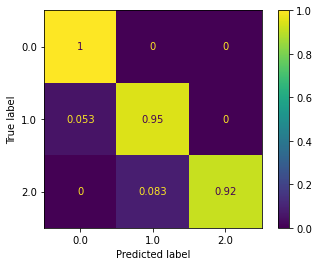

In [36]:
print("Бэггинг")

cm = confusion_matrix(y_test, bc_predict, labels=np.unique(df.target), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(df.target))
disp.plot()

Градиентный бустинг


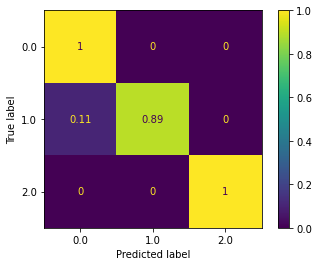

In [39]:
print("Градиентный бустинг")

cm = confusion_matrix(y_test, gb_predict, labels=np.unique(df.target), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(df.target))
disp.plot()

Стекинг (логистическая регрессия дерево и метод опорных векторов + дерево)


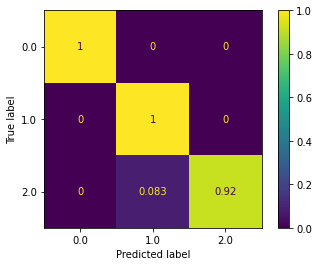

In [40]:
print("Стекинг (логистическая регрессия дерево и метод опорных векторов + дерево)")

cm = confusion_matrix(y_test, sc_predict, labels=np.unique(df.target), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(df.target))
disp.plot()